In [ ]:
from IPython import get_ipython
from IPython.display import display



import cv2 #for image processing
import easygui #to open the filebox
import numpy as np #to store image
import imageio #to read image stored at particular path
import sys
import matplotlib.pyplot as plt
import os
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image

In [ ]:
!pip install easygui

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.7/92.7 kB 2.3 MB/s eta 0:00:00


Saving download (1).jpg to download (1) (1).jpg


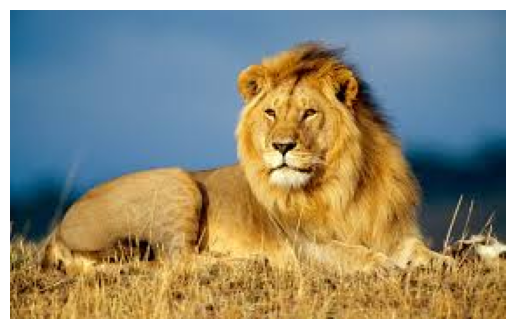

In [ ]:
# Upload an image
from google.colab import files
uploaded = files.upload()

# Load and display the image
image_path = list(uploaded.keys())[0]  # Get the uploaded file name
img = cv2.imread('/content/download (1).jpg')           # Read the image with OpenCV
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB (OpenCV uses BGR)

plt.imshow(img)
plt.axis("off")  # Hide axes
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

download (1) (1).jpg


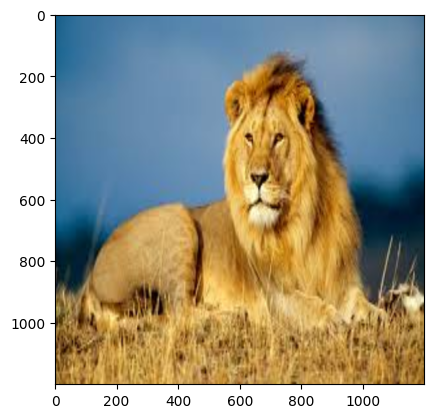

In [ ]:

    #read the image
    originalmage = cv2.imread(image_path)
    originalmage = cv2.cvtColor(originalmage, cv2.COLOR_BGR2RGB)
    print(image_path)  # image is stored in form of numbers

    # confirm that image is chosen
    if originalmage is None:
        print("Can not find any image. Choose appropriate file")
        sys.exit()

    ReSized1 = cv2.resize(originalmage, (1200, 1200))
    plt.imshow(ReSized1, cmap='gray')

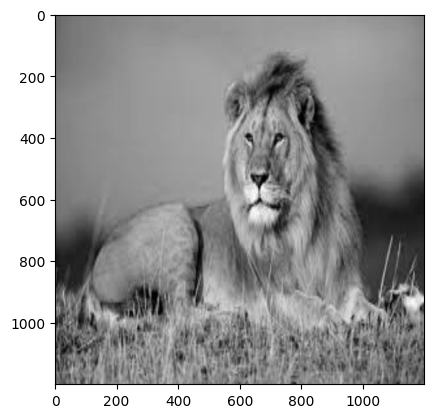

In [ ]:
#converting an image to grayscale
grayScaleImage = cv2.cvtColor(originalmage, cv2.COLOR_BGR2GRAY)
ReSized2 = cv2.resize(grayScaleImage, (1200, 1200))
plt.imshow(ReSized2, cmap='gray')

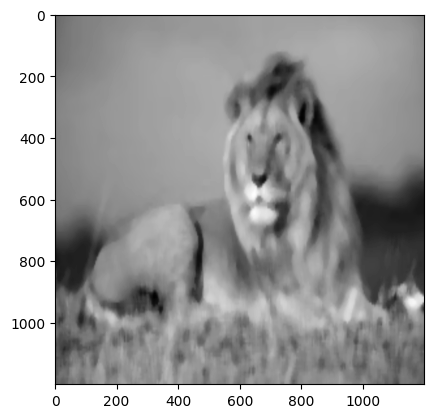

In [ ]:
#applying median blur to smoothen an image
smoothGrayScale = cv2.medianBlur(grayScaleImage, 5)
ReSized3 = cv2.resize(smoothGrayScale, (1200, 1200))
plt.imshow(ReSized3, cmap='gray')

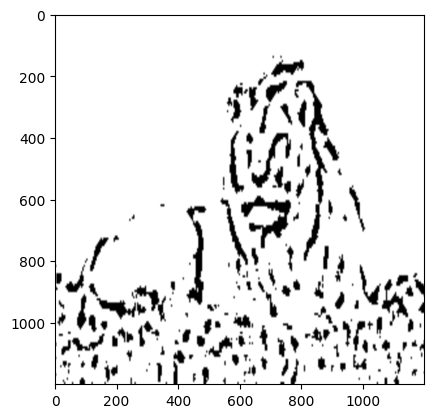

In [ ]:
#retrieving the edges for cartoon effect
#by using thresholding technique
getEdge = cv2.adaptiveThreshold(smoothGrayScale, 255,
  cv2.ADAPTIVE_THRESH_MEAN_C,
  cv2.THRESH_BINARY, 9, 9)

ReSized4 = cv2.resize(getEdge, (1200, 1200))
plt.imshow(ReSized4, cmap='gray')

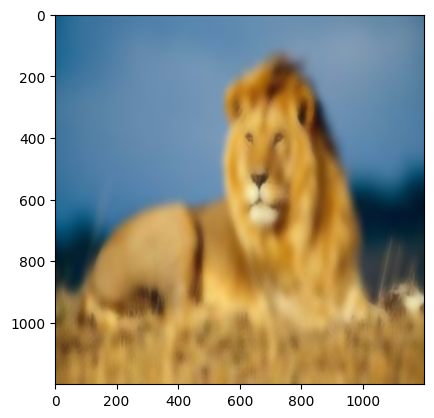

In [ ]:
#applying bilateral filter to remove noise
#and keep edge sharp as required
colorImage = cv2.bilateralFilter(originalmage, 9, 300, 300)
ReSized5 = cv2.resize(colorImage, (1200, 1200))
plt.imshow(ReSized5, cmap='gray')

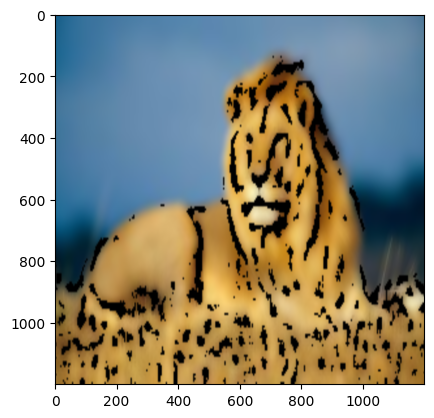

In [ ]:
#masking edged image with our "BEAUTIFY" image
cartoonImage = cv2.bitwise_and(colorImage, colorImage, mask=getEdge)

ReSized6 = cv2.resize(cartoonImage, (1200, 1200))
plt.imshow(ReSized6, cmap='gray')

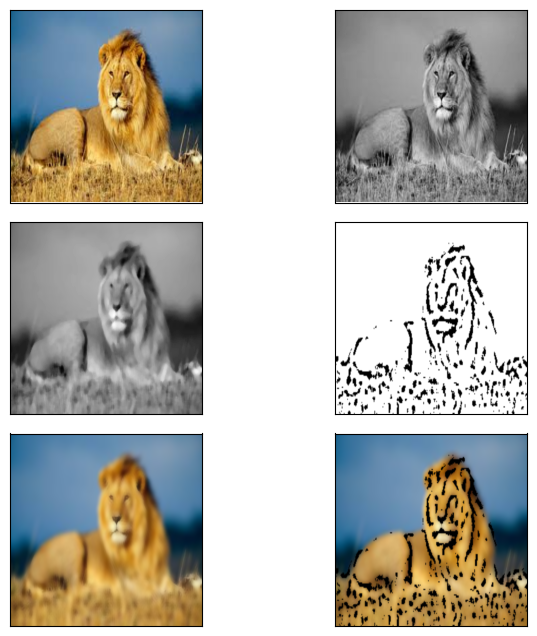

In [ ]:
# Plotting the whole transition
images=[ReSized1, ReSized2, ReSized3, ReSized4, ReSized5, ReSized6]
fig, axes = plt.subplots(3,2, figsize=(8,8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')
#//save button code
plt.show()

In [ ]:


# Function to save the image
def save(ReSized6, image_path):
    # Define the output path within the Colab environment
    save_path = "/content/download (1).jpg"

    # Save the image to the path
    cv2.imwrite(save_path, cv2.cvtColor(ReSized6, cv2.COLOR_RGB2BGR))

    print("Image saved to:", save_path)

save(ReSized6, image_path)  # Call the save function after displaying

Image saved to: /content/download (1).jpg
